### About the data

## Introduction to Neural Networks - Fraud Detection



**Objective:** In this notebook, given the credit card transactions, you will build a simple neural network for Fraud Detection using tensorflow.

This notebooks should cover,

1. Creating a Model

2. Adding Layers

3. Activations

4. Optimizers and Loss functions

5. Evaluation

### Dataset Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Steps to complete the assignment

- Download the data from the above link

- Import all necessary libraries

- Read the data

- Look at the shape of the data

- Drop unnecessary columns

- Check for null values and if exists treat them

- Perform EDA 

- Change the shape of the data if required. (Hint - keras.utils to to_categorical)
- Seperate our train and test 

- Normalize the data (You can check the performance without normalizing as well)

- Declare a sequential model

- Add multiple layers with activation functions 

- Add optimizers

- Compile the model

- FIT the model

- Evaluate the model 

- Generate metrics for the model 

- Generate AUC

- Precision and recall curve



  


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [30]:
df=pd.read_csv('Z:\\DS\\DATA SETS\\creditcard.csv')

In [31]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [33]:
df.shape

(284807, 31)

In [34]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
df[df['Class']==0].shape

(284315, 31)

In [36]:
df[df['Class']==1].shape

(492, 31)

In [37]:
df.drop(['Time','Amount'],axis=1,inplace=True)

dropped unnecesary features

In [38]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [39]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

There are no null values in the given dataset 

In [40]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [41]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [42]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [15]:
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
V6       float64
V7       float64
V8       float64
V9       float64
V10      float64
V11      float64
V12      float64
V13      float64
V14      float64
V15      float64
V16      float64
V17      float64
V18      float64
V19      float64
V20      float64
V21      float64
V22      float64
V23      float64
V24      float64
V25      float64
V26      float64
V27      float64
V28      float64
Class      int64
dtype: object

V1 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A181F87100>, <matplotlib.lines.Line2D object at 0x000001A181F87460>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A181F877C0>, <matplotlib.lines.Line2D object at 0x000001A181F87B20>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A181F6FD60>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A181F87E80>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A181F90220>], 'means': []}


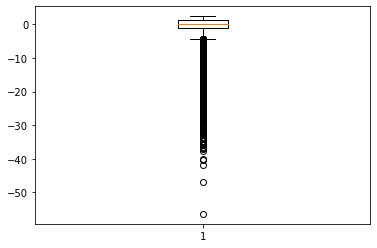

V2 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1820520D0>, <matplotlib.lines.Line2D object at 0x000001A182052430>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182052790>, <matplotlib.lines.Line2D object at 0x000001A182052AF0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182043D30>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182052E50>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18205D1F0>], 'means': []}


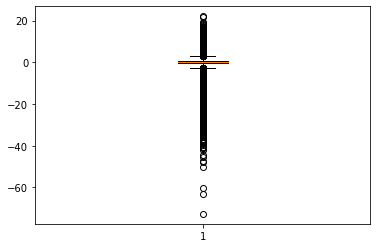

V3 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1820B04F0>, <matplotlib.lines.Line2D object at 0x000001A1820B0850>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1820B0BB0>, <matplotlib.lines.Line2D object at 0x000001A1820B0F10>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1820B0190>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1820B92B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1820B9610>], 'means': []}


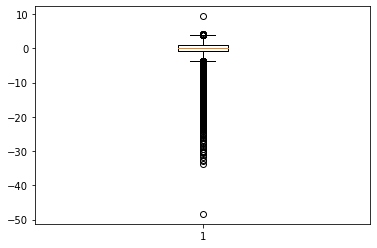

V4 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182110550>, <matplotlib.lines.Line2D object at 0x000001A1821108B0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182110C10>, <matplotlib.lines.Line2D object at 0x000001A182110F70>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1821101F0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18211B310>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18211B670>], 'means': []}


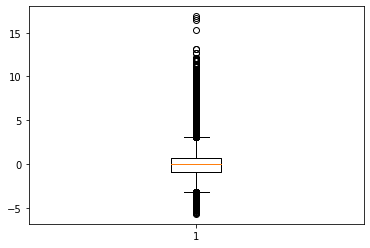

V5 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1821697F0>, <matplotlib.lines.Line2D object at 0x000001A182169B50>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182169EB0>, <matplotlib.lines.Line2D object at 0x000001A182174250>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182169490>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1821745B0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182174910>], 'means': []}


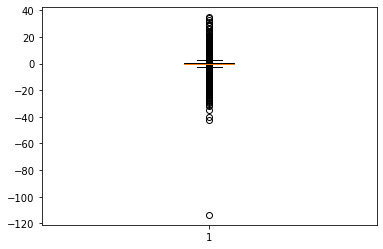

V6 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1821C9790>, <matplotlib.lines.Line2D object at 0x000001A1821C9AF0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1821C9E50>, <matplotlib.lines.Line2D object at 0x000001A1821D41F0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1821C9430>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1821D4550>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1821D48B0>], 'means': []}


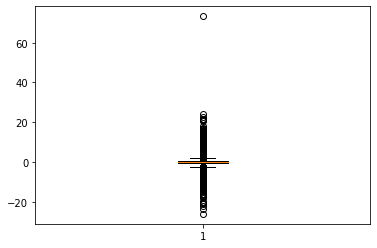

V7 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18221CC70>, <matplotlib.lines.Line2D object at 0x000001A18221CFD0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18222A370>, <matplotlib.lines.Line2D object at 0x000001A18222A6D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A18221C910>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18222AA30>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18222AD60>], 'means': []}


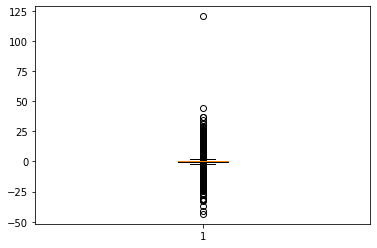

V8 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182275F70>, <matplotlib.lines.Line2D object at 0x000001A182286310>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182286670>, <matplotlib.lines.Line2D object at 0x000001A1822869D0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182275C10>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182286D00>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182294070>], 'means': []}


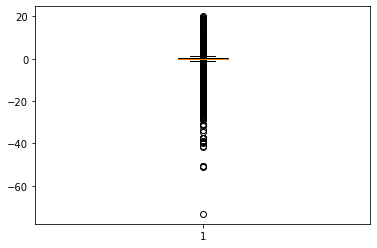

V9 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1822DB460>, <matplotlib.lines.Line2D object at 0x000001A1822DB7C0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1822DBB20>, <matplotlib.lines.Line2D object at 0x000001A1822DBE80>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1822DB100>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1822E71F0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1822E7520>], 'means': []}


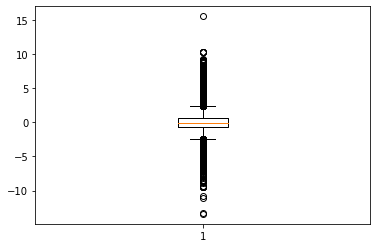

V10 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18232BD90>, <matplotlib.lines.Line2D object at 0x000001A18233A130>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18233A490>, <matplotlib.lines.Line2D object at 0x000001A18233A7F0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A18232BA30>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18233AB20>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18233AE50>], 'means': []}


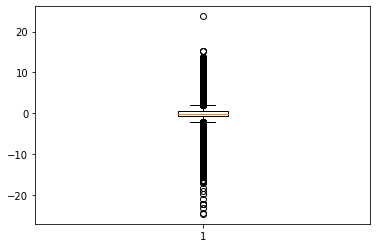

V11 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18238F220>, <matplotlib.lines.Line2D object at 0x000001A18238F580>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18238F8E0>, <matplotlib.lines.Line2D object at 0x000001A18238FC40>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182380E80>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18238FF70>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18239A2E0>], 'means': []}


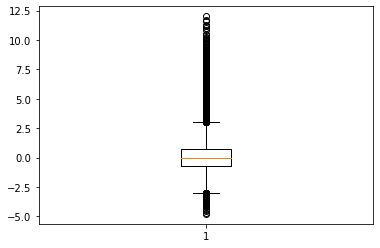

V12 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1823EB520>, <matplotlib.lines.Line2D object at 0x000001A1823EB880>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1823EBBE0>, <matplotlib.lines.Line2D object at 0x000001A1823EBF40>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1823EB1C0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1823F72E0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1823F7610>], 'means': []}


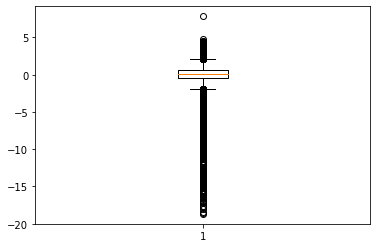

V13 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18243BE50>, <matplotlib.lines.Line2D object at 0x000001A1824491F0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182449550>, <matplotlib.lines.Line2D object at 0x000001A1824498B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A18243BAF0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182449C10>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182449F40>], 'means': []}


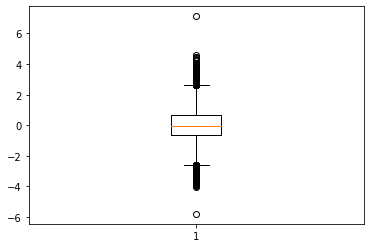

V14 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1FFF60D30>, <matplotlib.lines.Line2D object at 0x000001A1FFF60580>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1FFF60220>, <matplotlib.lines.Line2D object at 0x000001A1FFF56E80>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A180232970>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1FFF56B20>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1FFF567C0>], 'means': []}


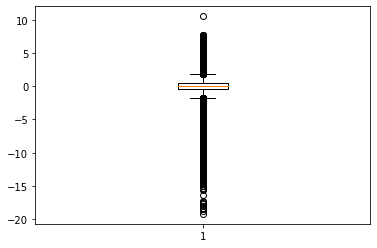

V15 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1823C4670>, <matplotlib.lines.Line2D object at 0x000001A1823C4160>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1823CC310>, <matplotlib.lines.Line2D object at 0x000001A1823CCF40>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1823C4DC0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1823CC8E0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1823CCB80>], 'means': []}


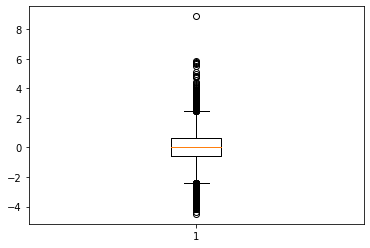

V16 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1823002B0>, <matplotlib.lines.Line2D object at 0x000001A182286A30>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182286CA0>, <matplotlib.lines.Line2D object at 0x000001A1822861C0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182300970>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182286B20>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182286F40>], 'means': []}


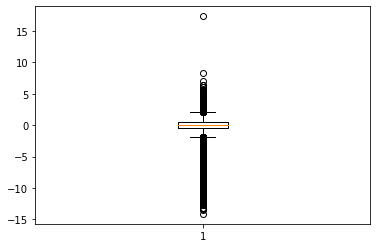

V17 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182103430>, <matplotlib.lines.Line2D object at 0x000001A1821037F0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182135DF0>, <matplotlib.lines.Line2D object at 0x000001A182135CA0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182103BB0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182135160>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1821359A0>], 'means': []}


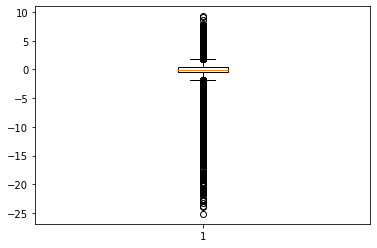

V18 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A181FAF2E0>, <matplotlib.lines.Line2D object at 0x000001A181FAFD30>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1FFF4DE20>, <matplotlib.lines.Line2D object at 0x000001A1FFF4DAF0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A181FAF7C0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A181D8A220>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A181D8A3A0>], 'means': []}


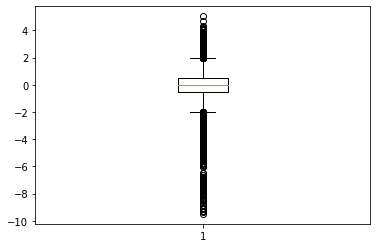

V19 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1823D9B50>, <matplotlib.lines.Line2D object at 0x000001A1823D9EB0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1823D2250>, <matplotlib.lines.Line2D object at 0x000001A1823D25B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1823D97F0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1823D2910>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1823D2C70>], 'means': []}


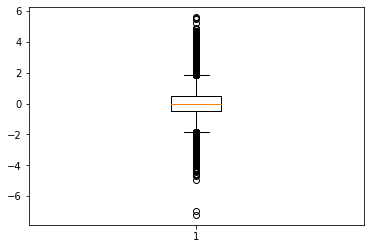

V20 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18248D580>, <matplotlib.lines.Line2D object at 0x000001A18248D8E0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18248DC40>, <matplotlib.lines.Line2D object at 0x000001A18248DFA0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A18248D220>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182498340>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1824986A0>], 'means': []}


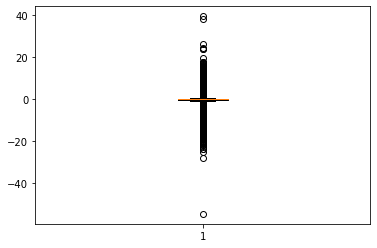

V21 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1820FC520>, <matplotlib.lines.Line2D object at 0x000001A1820FC880>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1820FCBE0>, <matplotlib.lines.Line2D object at 0x000001A1820FCF40>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1820FC1C0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1821122E0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182112640>], 'means': []}


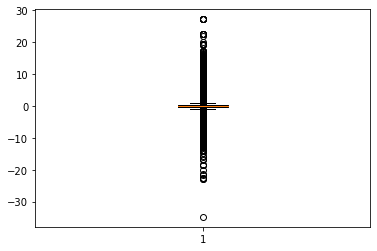

V22 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182393F10>, <matplotlib.lines.Line2D object at 0x000001A18224C2B0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18224C610>, <matplotlib.lines.Line2D object at 0x000001A18224C970>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182393BB0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18224CCD0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182266070>], 'means': []}


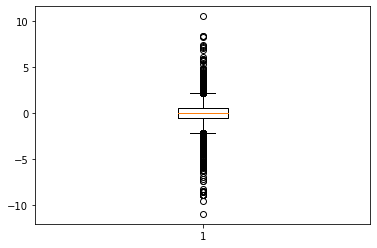

V23 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1821A6E80>, <matplotlib.lines.Line2D object at 0x000001A182181220>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182181580>, <matplotlib.lines.Line2D object at 0x000001A1821818E0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1821A6B20>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182181C40>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182181FA0>], 'means': []}


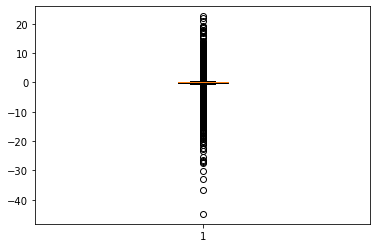

V24 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1820328B0>, <matplotlib.lines.Line2D object at 0x000001A182032C10>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182032F70>, <matplotlib.lines.Line2D object at 0x000001A182030310>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182032550>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182030670>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1820309D0>], 'means': []}


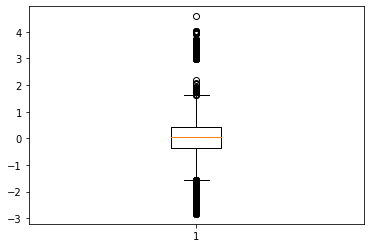

V25 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182147880>, <matplotlib.lines.Line2D object at 0x000001A182147BE0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182147F40>, <matplotlib.lines.Line2D object at 0x000001A18214A2E0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182147520>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A18214A640>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A18214A9A0>], 'means': []}


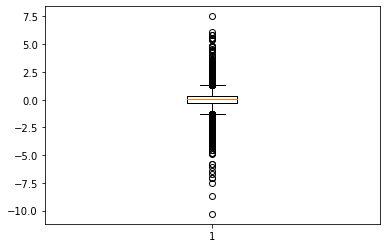

V26 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1822CE820>, <matplotlib.lines.Line2D object at 0x000001A1822CEB80>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1822CEEE0>, <matplotlib.lines.Line2D object at 0x000001A1822B1280>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1822CE4C0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1822B15E0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1822B1940>], 'means': []}


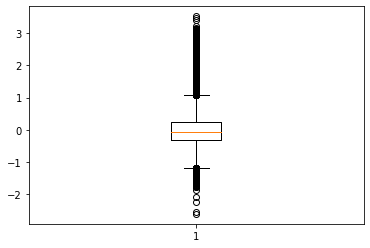

V27 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A1824B0CD0>, <matplotlib.lines.Line2D object at 0x000001A1824BF070>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A1824BF3D0>, <matplotlib.lines.Line2D object at 0x000001A1824BF730>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A1824B0970>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A1824BFA90>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1824BFDF0>], 'means': []}


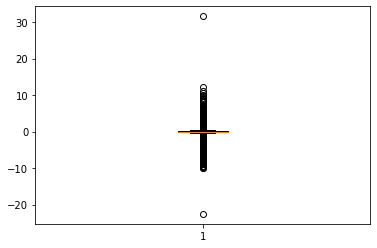

V28 {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A182515070>, <matplotlib.lines.Line2D object at 0x000001A1825153D0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A182515730>, <matplotlib.lines.Line2D object at 0x000001A182515A90>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A182506CD0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182515DC0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A182522130>], 'means': []}


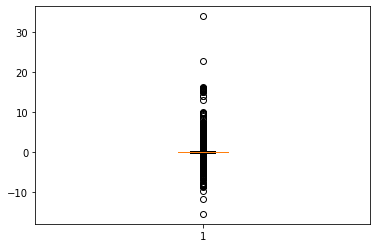

Class {'whiskers': [<matplotlib.lines.Line2D object at 0x000001A18256A4C0>, <matplotlib.lines.Line2D object at 0x000001A18256A850>], 'caps': [<matplotlib.lines.Line2D object at 0x000001A18256ABB0>, <matplotlib.lines.Line2D object at 0x000001A18256AF10>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001A18256A160>], 'medians': [<matplotlib.lines.Line2D object at 0x000001A182576280>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001A1825765B0>], 'means': []}


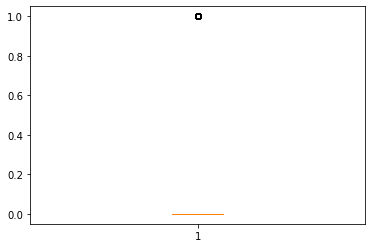

In [20]:
for i in df.columns:
    print(i,plt.boxplot(df[i]))
    plt.show()
    
                

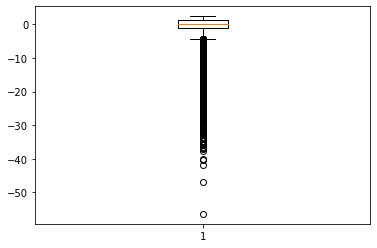

In [22]:
plot_boxplot(df,df["V1"])

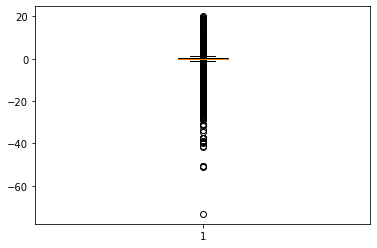

In [23]:
plot_boxplot(df,df["V8"])

### Data Visualization

In [43]:
df[["Class"]].value_counts()

Class
0        284315
1           492
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

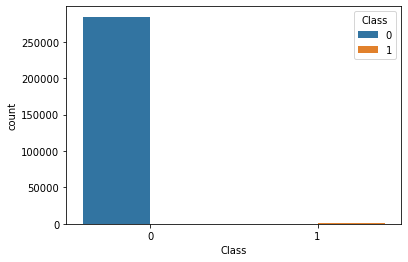

In [44]:
sns.countplot(df["Class"],hue=df['Class'])

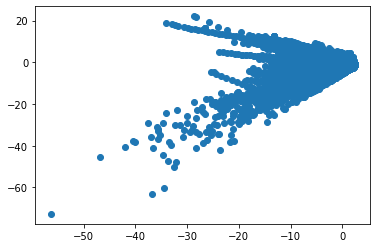

In [45]:
plt.scatter(df["V1"],df["V2"])

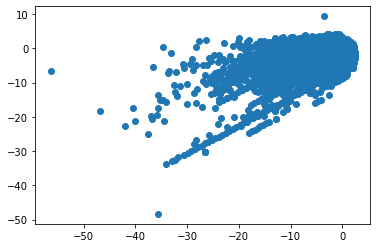

In [46]:
plt.scatter(df["V1"],df["V3"])

<AxesSubplot:xlabel='V1', ylabel='Density'>

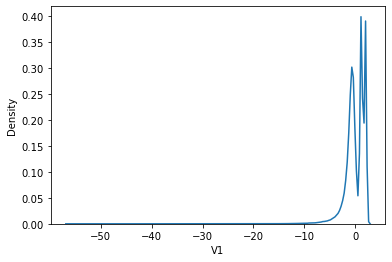

In [47]:
sns.kdeplot(df["V1"])

### Train test split


In [49]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [51]:
x_train.shape

(199364, 28)

In [52]:
y_train.shape

(199364,)

In [53]:
x_test.shape

(85443, 28)

In [54]:
y_test.shape

(85443,)

### Normalization

In [55]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)


In [56]:
x_test_norm

array([[0.94790155, 0.75913684, 0.83481851, ..., 0.39259159, 0.41773842,
        0.31761228],
       [0.94445334, 0.78117808, 0.86045049, ..., 0.43861756, 0.41950899,
        0.31433041],
       [0.95288806, 0.77906144, 0.85421999, ..., 0.44532434, 0.42110784,
        0.31500129],
       ...,
       [0.95530307, 0.77879365, 0.87493443, ..., 0.41356147, 0.41702978,
        0.31219959],
       [0.99228732, 0.76218834, 0.82587722, ..., 0.52908085, 0.41616233,
        0.31225814],
       [0.97633014, 0.7640137 , 0.84750355, ..., 0.48673083, 0.41605021,
        0.31362229]])

### Creating  a model


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import optimizers,regularizers


In [58]:
df.shape

(284807, 29)

In [59]:
x_train.shape

(199364, 28)

In [82]:
model=Sequential()

#model.add(Dense(256,input_shape=(28,),activation='relu'))

model.add(BatchNormalization(input_shape=(28,)))

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='softmax'))



### Compiling the model

In [83]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28)                112       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 3,953
Trainable params: 3,897
Non-trainable params: 56
_________________________________________________________________


In [85]:
model.evaluate(x_train,y_train)

6231/6231 [==============================] - 8s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0018


[0.0, 0.0017906944267451763]

In [86]:
model.evaluate(x_test,y_test)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0016


[0.0, 0.0015800007386133075]

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2)

In [105]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks=es)

Epoch 1/5
6231/6231 [==============================] - 12s 2ms/step - loss: nan - accuracy: 0.9982 - val_loss: nan - val_accuracy: 0.9984
Epoch 2/5
6231/6231 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.9982 - val_loss: nan - val_accuracy: 0.9984


In [106]:
model.evaluate(x_train,y_train)

6231/6231 [==============================] - 9s 1ms/step - loss: nan - accuracy: 0.9982


[nan, 0.9982092976570129]

In [107]:
model.evaluate(x_test,y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: nan - accuracy: 0.9984


[nan, 0.998420000076294]

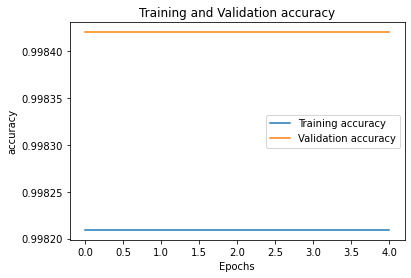

In [102]:
history_df = pd.DataFrame(history.history)

plt.plot(history['accuracy'],label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")

plt.show()

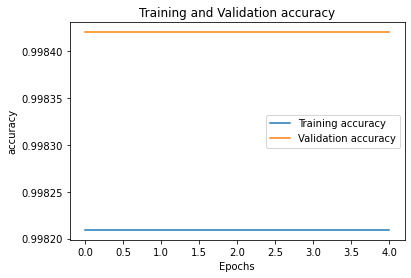

In [103]:
#history_df = pd.DataFrame(history.history)

plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")

plt.show()